In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('cognifyz_dataset.xlsx')
df.head(2)

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


### **Metadata**

1. **`Restaurant ID`**: Unique identifier for each restaurant.                                                  
2. **`Restaurant Name`**: Name of the restaurant.                                                                  
3. **`Country Code`**: Numeric code representing the country.                                                           
4. **`City`**: City where the restaurant is located.                                                     
5. **`Address`**: Full address of the restaurant.                          
6. **`Locality`**: Local area or neighborhood.                                     
7. **`Locality Verbose`**: Extended locality description.                        
8. **`Longitude`**: Longitude coordinate.                                                         
9. **`Latitude`**: Latitude coordinate.                      
10. **`Cuisines`**: Types of cuisines offered.                                                     
11. **`Average Cost for two`**: Estimated average cost for two people.                                                          
12. **`Currency`**:  Currency used for pricing.                                                             
13. **`Has Table booking`**: Indicates if table booking is available.                                          
14. **`Has Online delivery`**: Indicates if online delivery is available.                                               
15. **`Is delivering now`**: Indicates if the restaurant is currently delivering.                                                     
16. **`Switch to order menu`**: Indicates if a switch to order menu is available.                                                     
17. **`Price range`**: Numeric price range classification (usually 1–4).                                                  
18. **`Aggregate rating`**: Average customer rating.                                                                                
19. **`Rating color`**: Color code corresponding to rating level.                                                  
20. **`Rating text`**: Textual description of the rating.                                                                 
21. **`Votes`**: Number of user votes/reviews.                                                                     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [7]:
df.dropna(inplace = True)

In [8]:
df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542
unique,7437,140,8910,1206,1263,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8384,7091,9508,9542,3734,3734


In [9]:
df.describe(include='number')

,ï»¿Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.columns = ['restaurant_id','restaurant_name','country_code','city','address','locality','locality_verbose','longitude','latitude','cuisines',
              'avg_cost_for_two','currency','table_booking','online_delivery','delivering_now','switch_to_order_menu','price_range','aggregate_rating',
              'rating_color','rating_text','votes']

In [12]:
df.avg_cost_for_two.unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [13]:
df['currency'].value_counts()

currency
Indian Rupees(Rs.)        8652
Dollar($)                  473
Pounds(ï¿½ï¿½)              80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

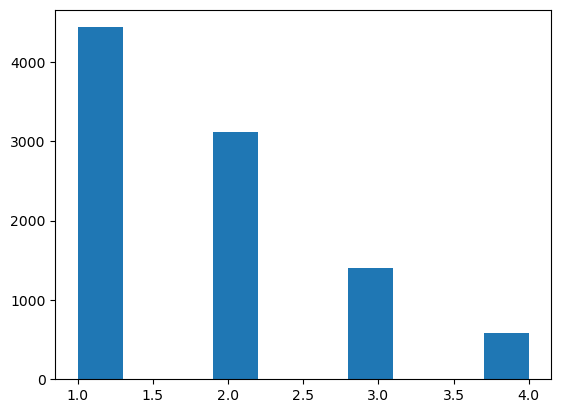

In [14]:
df['price_range'].hist()
plt.grid(False)

<Axes: xlabel='price_range'>

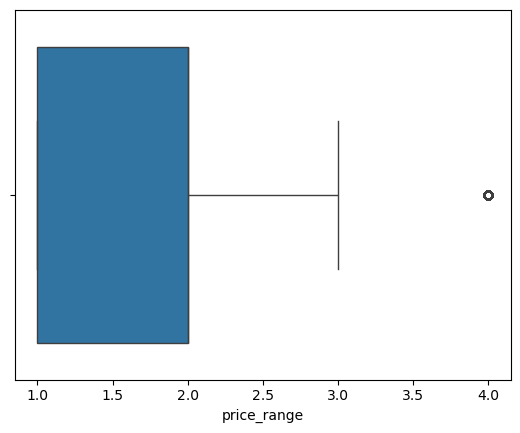

In [15]:
sns.boxplot(x = df['price_range'])

In [16]:
df.loc[df['price_range'] == 4.0]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,6000409,Cafemiz,208,Ankara,"Gaziosmanpaï¿½ï¿½a Mahallesi, Arjantin Caddesi...",Gazi Osman Paï¿½ï¿½a,"Gazi Osman Paï¿½ï¿½a, Ankara",32.865683,39.897872,"World Cuisine, Mexican, Italian",150,Turkish Lira(TL),No,No,No,No,4,4.4,Green,Very Good,115
9526,6000019,Nusr-Et,208,Ankara,"Gaziosmanpaï¿½ï¿½a Mahallesi, ï¿½_ehit ï¿½_mer...",Gazi Osman Paï¿½ï¿½a,"Gazi Osman Paï¿½ï¿½a, Ankara",32.864833,39.899667,Steak,400,Turkish Lira(TL),No,No,No,No,4,4.1,Green,Very Good,97
9540,5927248,Draft Gastro Pub,208,ï¿½ï¿½stanbul,"Caddebostan Mahallesi, Baï¿½ï¿½dat Caddesi, No...",Caddebostan,"Caddebostan, ï¿½ï¿½stanbul",29.074116,40.963935,Bar Food,130,Turkish Lira(TL),No,No,No,No,4,4.9,Dark Green,Excellent,522
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661


In [17]:
df.loc[df['price_range'] == 3.0]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9541,5905215,Emirgan Sï¿½_tiï¿½ï¿½,208,ï¿½ï¿½stanbul,"Emirgan Mahallesi, SakÛ±p SabancÛ± Caddesi, No...",Emirgï¿½ï¿½n,"Emirgï¿½ï¿½n, ï¿½ï¿½stanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",75,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877
9542,5926979,Leman Kï¿½_ltï¿½_r,208,ï¿½ï¿½stanbul,"Caferaï¿½ï¿½a Mahallesi, Neï¿½ï¿½et ï¿½_mer So...",KadÛ±kï¿½_y Merkez,"KadÛ±kï¿½_y Merkez, ï¿½ï¿½stanbul",29.022805,40.989705,Restaurant Cafe,80,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506
9545,5915054,Baltazar,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.981103,41.025785,"Burger, Izgara",90,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788


In [18]:
df.loc[df['price_range'] == 2.0]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
18,18255654,Hobing Korean Dessert Cafe,162,Taguig City,"Third Floor, BGC Stopover Pavillion, Rizal Dri...","BGC Stopover Pavillion, Bonifacio Global City","BGC Stopover Pavillion, Bonifacio Global City,...",121.045878,14.554360,"Cafe, Korean, Desserts",600,Botswana Pula(P),No,No,No,No,2,4.5,Dark Green,Excellent,118
22,6600681,Chez Michou,30,Brasï¿½_lia,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Brasï¿...",Asa Norte,"Asa Norte, Brasï¿½_lia",-47.881789,-15.764142,"Fast Food, French",55,Brazilian Real(R$),No,No,No,No,2,3.0,Orange,Average,6
24,6600292,Casa do Biscoito Mineiro,30,Brasï¿½_lia,"SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...",Asa Norte,"Asa Norte, Brasï¿½_lia",-47.882136,-15.757472,Bakery,45,Brazilian Real(R$),No,No,No,No,2,3.7,Yellow,Good,11
26,6600970,Pizza ï¿½ï¿½ Bessa,30,Brasï¿½_lia,"SCS 214, Bloco C, Loja 40, Asa Sul, Brasï¿½_lia",Asa Sul,"Asa Sul, Brasï¿½_lia",-47.915667,-15.831167,Pizza,50,Brazilian Real(R$),No,No,No,No,2,3.2,Orange,Average,11
41,6601457,Brazilian American Burgers,30,Brasï¿½_lia,"CLSN 301, Bloco C, Loja 86, Sudoeste, Brasï¿½_lia",Sudoeste,"Sudoeste, Brasï¿½_lia",-47.921028,-15.797531,"American, Burger",50,Brazilian Real(R$),No,No,No,No,2,3.6,Yellow,Good,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,5904116,J'adore Chocolatier,208,ï¿½ï¿½stanbul,"AsmalÛ±mescit Mahallesi, ï¿½ï¿½stiklal Caddesi...",AsmalÛ±mescit,"AsmalÛ±mescit, ï¿½ï¿½stanbul",28.976127,41.033002,Desserts,50,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1311
9538,5901782,Starbucks,208,ï¿½ï¿½stanbul,"Bebek Mahallesi, Cevdetpaï¿½ï¿½a Caddesi, No 3...",Bebek,"Bebek, ï¿½ï¿½stanbul",29.043734,41.077696,Cafe,30,Turkish Lira(TL),No,No,No,No,2,4.9,Dark Green,Excellent,1042
9543,5916085,Dem Karakï¿½_y,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.978237,41.024633,Cafe,35,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761
9544,5915547,Karakï¿½_y Gï¿½_llï¿½_oï¿½ï¿½lu,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977636,41.022904,"Desserts, Bï¿½_rek",40,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305


In [19]:
df.loc[df['price_range'] == 1.0]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
23,6601005,Cafï¿½ï¿½ Daniel Briand,30,Brasï¿½_lia,"SCLN 104, Bloco A, Loja 26, Asa Norte, Brasï¿½...",Asa Norte,"Asa Norte, Brasï¿½_lia",-47.882667,-15.777500,Cafe,30,Brazilian Real(R$),No,No,No,No,1,3.8,Yellow,Good,9
30,6600060,Sandubas Cafï¿½ï¿½,30,Brasï¿½_lia,"Edifï¿½_cio Josï¿½ï¿½ Severo, SCS 6, Bloco A, ...",Asa Sul,"Asa Sul, Brasï¿½_lia",-47.890167,-15.797000,"Brazilian, Cafe",30,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
83,17284203,BJ's Country Buffet,216,Albany,"2401 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.207095,31.608743,"American, BBQ",10,Dollar($),No,No,No,No,1,3.3,Orange,Average,25
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219400,31.615800,Mexican,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
86,17284397,Elements Coffee Co - Northwest,216,Albany,"2726 Ledo Rd Ste 10, Albany, GA 31707",Albany,"Albany, Albany",-84.206944,31.622412,"Coffee and Tea, Sandwich",10,Dollar($),No,No,No,No,1,3.4,Orange,Average,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,7101011,Ekim Burgers,148,Wellington City,"257 Cuba Street, Te Aro, Wellington City",Te Aro,"Te Aro, Wellington City",174.774151,-41.296107,Fast Food,25,NewZealand($),No,No,No,No,1,4.5,Dark Green,Excellent,195
9337,6900714,Pepe's Piri Piri,215,Birmingham,"254-256 Alum Rock Road, Alum Rock, Birmingham ...",Alum Rock,"Alum Rock, Birmingham",-1.846811,52.488557,Fast Food,10,Pounds(ï¿½ï¿½),No,No,No,No,1,2.8,Orange,Average,26
9338,6900883,Ju Ju's Cafe,215,Birmingham,"1 Canal Square, Brindleyplace, Birmingham B16 8EH",Brindleyplace,"Brindleyplace, Birmingham",-1.918049,52.477569,"Cafe, British",15,Pounds(ï¿½ï¿½),No,No,No,No,1,3.7,Yellow,Good,13
9353,6901394,Jamjar,215,Birmingham,"418 Coventry Road, Small Heath, Birmingham B10...",Small Heath,"Small Heath, Birmingham",-1.860593,52.470571,"Ice Cream, Desserts, Cafe",15,Pounds(ï¿½ï¿½),No,No,No,No,1,3.1,Orange,Average,11


In [20]:
df['avg_cost_for_two'].min()

np.int64(0)

In [21]:
df['avg_cost_for_two'].max()

np.int64(800000)

<Axes: xlabel='avg_cost_for_two'>

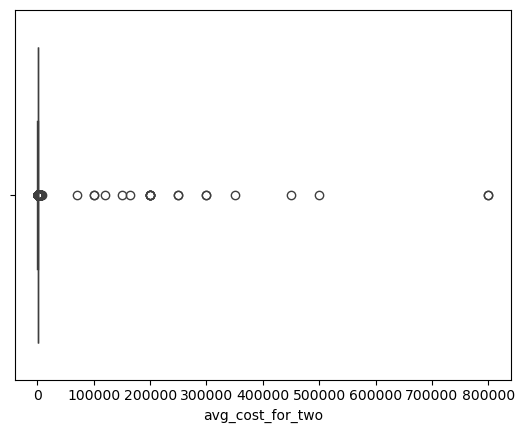

In [22]:
sns.boxplot(x = df['avg_cost_for_two'])

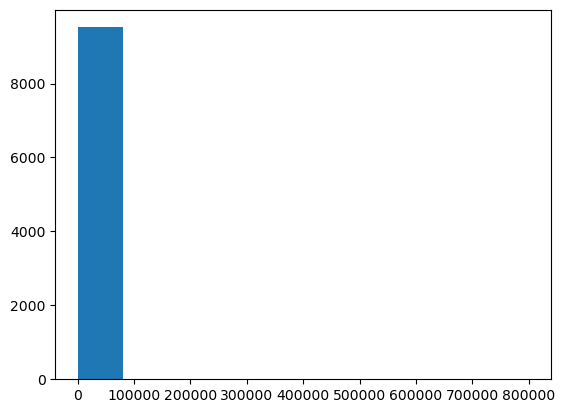

In [23]:
df['avg_cost_for_two'].hist()
plt.grid(False)

In [24]:
df['avg_cost_for_two'].value_counts(ascending=False).head(60)

avg_cost_for_two
500       900
300       897
400       857
200       687
600       652
250       461
350       457
700       403
150       367
100       353
800       347
450       335
1000      281
1500      190
550       183
650       177
25        174
1200      145
10        125
40        112
2000      110
900       109
1100       80
1400       78
1600       78
1300       68
750        68
1800       68
50         55
850        55
2500       54
3000       41
70         35
1700       31
2200       27
20         25
30         24
950        21
60         19
80         19
35         17
120        17
1250       17
1900       16
0          15
90         14
4000       13
4500       13
3500       13
5000       12
45         12
55         10
2100       10
2400        8
1350        8
1650        8
200000      6
160         6
230         6
1550        6
Name: count, dtype: int64

In [25]:
df.loc[df['avg_cost_for_two'] == 0]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.219400,31.615800,Mexican,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
201,17330155,Deorio's,216,Columbus,"3201 Macon Rd Ste 167, Columbus, GA 31906",Columbus,"Columbus, Columbus",-84.942700,32.481000,"Italian, Pizza",0,Dollar($),No,No,No,No,1,4.0,Green,Very Good,170
240,17334679,Azteca,216,Davenport,"4811 N Brady St Ste 3, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.568300,41.569900,Mexican,0,Dollar($),No,No,No,No,1,4.3,Green,Very Good,167
277,17342548,Happy Joe's Pizza & Ice Cream,216,Dubuque,"855 Century Dr, Dubuque, IA 52002",Dubuque,"Dubuque, Dubuque",-90.726400,42.495500,"Desserts, Pizza, Ice Cream",0,Dollar($),No,No,No,No,1,3.5,Yellow,Good,74
397,17582499,Royal Hotel,216,Pocatello,"11 E Main St, Lava Hot Springs, ID 83246",Lava Hot Springs,"Lava Hot Springs, Pocatello",-112.012700,42.619200,"Pizza, Bar Food",0,Dollar($),No,No,No,No,1,3.6,Yellow,Good,59
407,17582627,Senor Iguanas,216,Pocatello,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.443300,42.894200,Mexican,0,Dollar($),No,No,No,No,1,3.6,Yellow,Good,108
634,3400073,The Latitude - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,No,No,1,3.9,Yellow,Good,103
637,3400346,Sheroes Hangout,1,Agra,"Opposite The Gateway Hotel, Fatehabad Road, Ta...",Tajganj,"Tajganj, Agra",78.040165,27.161850,"Cafe, North Indian, Chinese",0,Indian Rupees(Rs.),No,No,No,No,1,4.9,Dark Green,Excellent,77
639,3400391,Chapter 1 Cafe,1,Agra,"1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...",Tajganj,"Tajganj, Agra",0.000000,0.000000,"Cafe, Italian, Mexican, North Indian, Continental",0,Indian Rupees(Rs.),No,No,No,No,1,3.9,Yellow,Good,98
677,18317988,The BrewMaster,1,Allahabad,"Near Vishal Megamart, Civil Lines, Allahabad",Civil Lines,"Civil Lines, Allahabad",81.832796,25.451646,"North Indian, Chinese, Italian",0,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,49


## There are 15 rows where 'avg_cost_for_two' is 0.

In [26]:
df.loc[(df['avg_cost_for_two'] > 0) & (df['avg_cost_for_two'] < 1000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
11,6309455,Mad Mark's Creamery & Good Eats,162,Pasig City,"23 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.060820,14.570849,"American, Ice Cream, Desserts",900,Botswana Pula(P),Yes,No,No,No,3,4.2,Green,Very Good,488
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
14,6314605,Sodam Korean Restaurant,162,San Juan City,"17 J. Abad Santos Drive, Little Baguio, San Ju...",Little Baguio,"Little Baguio, San Juan City",121.038110,14.598890,Korean,700,Botswana Pula(P),No,No,No,No,3,4.3,Green,Very Good,223
15,18185059,Cafe Arabelle,162,Santa Rosa,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa Rosa","Nuvali, Don Jose, Santa Rosa, Santa Rosa",121.057040,14.237082,"Cafe, American, Italian, Filipino",800,Botswana Pula(P),No,No,No,No,3,3.6,Yellow,Good,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [27]:
df.loc[(df['avg_cost_for_two'] > 0) & (df['avg_cost_for_two'] < 1000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
11,6309455,Mad Mark's Creamery & Good Eats,162,Pasig City,"23 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.060820,14.570849,"American, Ice Cream, Desserts",900,Botswana Pula(P),Yes,No,No,No,3,4.2,Green,Very Good,488
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
14,6314605,Sodam Korean Restaurant,162,San Juan City,"17 J. Abad Santos Drive, Little Baguio, San Ju...",Little Baguio,"Little Baguio, San Juan City",121.038110,14.598890,Korean,700,Botswana Pula(P),No,No,No,No,3,4.3,Green,Very Good,223
15,18185059,Cafe Arabelle,162,Santa Rosa,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa Rosa","Nuvali, Don Jose, Santa Rosa, Santa Rosa",121.057040,14.237082,"Cafe, American, Italian, Filipino",800,Botswana Pula(P),No,No,No,No,3,3.6,Yellow,Good,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [28]:
df.loc[(df['avg_cost_for_two'] > 1000) & (df['avg_cost_for_two'] < 50000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5800316,Cricket Club Cafe,191,Colombo,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",0.000000,0.000000,"Continental, American, Seafood",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,171
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,4000,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203


In [29]:
df.loc[(df['avg_cost_for_two'] > 50000) & (df['avg_cost_for_two'] < 90000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
9277,7423620,Momo Milk,94,Bogor,"Jl. Kantor Pos No. 6, Bogor Timur, Bogor",Bogor Timur,"Bogor Timur, Bogor",106.810301,-6.606917,"Cafe, Desserts, Beverages",70000,Indonesian Rupiah(IDR),No,No,No,No,2,3.7,Yellow,Good,783


In [30]:
df.loc[(df['avg_cost_for_two'] > 90000) & (df['avg_cost_for_two'] == 100000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
9292,18409146,Fish Streat,94,Jakarta,"Jl. Tanjung Duren Utara III, Blok M Kav. 32, T...",Tanjung Duren,"Tanjung Duren, Jakarta",0.000000,0.000000,"Seafood, Western",100000,Indonesian Rupiah(IDR),No,No,No,No,3,3.4,Orange,Average,152
9293,18408381,Fish Streat,94,Jakarta,"Jl. Tebet Timur Dalam Raya 44B, Tebet, Jakarta",Tebet,"Tebet, Jakarta",106.856413,-6.232816,"Seafood, Western",100000,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,331


In [31]:
df.loc[(df['avg_cost_for_two'] > 100000) & (df['avg_cost_for_two'] < 200000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",150000,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,22
9280,7405789,Toodz House,94,Jakarta,"Jl. Cipete Raya No. 79, Fatmawati, Jakarta",Fatmawati,"Fatmawati, Jakarta",106.801782,-6.278012,"Cafe, Italian, Coffee and Tea, Western, Indone...",165000,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,1476
9290,18370659,Flip Burger,94,Jakarta,"Jl. Senopati No. 27, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.808550,-6.230775,Burger,120000,Indonesian Rupiah(IDR),No,No,No,No,3,4.4,Green,Very Good,410


In [32]:
df.loc[(df['avg_cost_for_two'] > 200000) & (df['avg_cost_for_two'] < 400000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",250000,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,1159
9285,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",250000,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,259
9288,18352452,Lucky Cat Coffee & Kitchen,94,Jakarta,"Plaza Festival, South Parking, Jl. HR Rasuna S...","Plaza Festival, Kuningan","Plaza Festival, Kuningan, Jakarta",106.831748,-6.218932,"Cafe, Western",300000,Indonesian Rupiah(IDR),No,No,No,No,3,4.3,Green,Very Good,458
9294,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,No,No,3,4.3,Green,Very Good,243
9295,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,300000,Indonesian Rupiah(IDR),No,No,No,No,3,3.7,Yellow,Good,155


In [33]:
df.loc[(df['avg_cost_for_two'] > 400000) & (df['avg_cost_for_two'] > 600000)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,No,No,3,4.1,Green,Very Good,1498
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,873


## There are 13 rows where prices are very high, may be outliers.

In [34]:
df.loc[df['avg_cost_for_two'] > 400]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,4000,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203
9515,5801321,Cafe Beverly,191,Colombo,"475/C, Sri Jayawardenapura Mawatha, Welikada, ...","Rajagiriya, Colombo","Rajagiriya, Colombo, Colombo",79.902941,6.906815,"Continental, American",2000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.1,Green,Very Good,58


In [35]:
df.loc[df['avg_cost_for_two'] > 1000]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5800316,Cricket Club Cafe,191,Colombo,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",0.000000,0.000000,"Continental, American, Seafood",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,171
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,4000,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203


In [36]:
df.loc[df['avg_cost_for_two'] > 2000]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
20,6315438,NIU by Vikings,162,Taguig City,"Sixth Floor, SM Aura Premier, C5 Road Corner 2...","SM Aura Premier, Bonifacio Global City, Taguig...","SM Aura Premier, Bonifacio Global City, Taguig...",121.053725,14.545858,"Seafood, American, Mediterranean, Japanese",3000,Botswana Pula(P),Yes,No,No,No,4,4.7,Dark Green,Excellent,535
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",2500,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,2500,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,5801078,Arabian Knights,191,Colombo,"377, Opposite Amana Bank, Galle Road, Kollupit...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852248,6.904392,"Middle Eastern, Arabian",2400,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,158
9511,5800316,Cricket Club Cafe,191,Colombo,"12 Flower Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",0.000000,0.000000,"Continental, American, Seafood",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,171
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",3000,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286


In [37]:
df.loc[df['avg_cost_for_two'] > 3000]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",3600,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46
1216,4358,Cafe G - Crowne Plaza,1,Gurgaon,"Crowne Plaza, NH-8, Sector 29, Gurgaon","Crowne Plaza, Sector 29","Crowne Plaza, Sector 29, Gurgaon",77.060089,28.468433,"North Indian, Continental, Chinese",3500,Indian Rupees(Rs.),Yes,No,No,No,4,3.9,Yellow,Good,181
1217,2443,Wildfire - Crowne Plaza,1,Gurgaon,"Crowne Plaza, National Highway 8, Sector 29, G...","Crowne Plaza, Sector 29","Crowne Plaza, Sector 29, Gurgaon",77.059909,28.468415,South American,5000,Indian Rupees(Rs.),Yes,No,No,No,4,3.7,Yellow,Good,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,75989,Restaurant Mosaic @ The Orient,189,Pretoria,"The Orient Boutique Hotel, Crocodile River Val...",West Park,"West Park, Pretoria",27.999097,-25.761238,French,3210,Rand(R),No,No,No,No,4,4.9,Dark Green,Excellent,85
9504,5800746,T.G.I. Friday's,191,Colombo,"23, Canal Row, Fort, Colombo 01","Fort, Colombo 01","Fort, Colombo 01, Colombo",79.843575,6.932547,"American, Steak",4000,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,166
9506,5800758,Cafe Shaze,191,Colombo,"65, Thimbirigasaya Road, Havelock Town, Colomb...","Havelock Town, Colombo 05","Havelock Town, Colombo 05, Colombo",79.865639,6.890906,"Cafe, Fast Food, Beverages",3500,Sri Lankan Rupee(LKR),No,No,No,No,3,3.8,Yellow,Good,81
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",4500,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196


In [38]:
df.loc[df['avg_cost_for_two'] > 4000]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
1217,2443,Wildfire - Crowne Plaza,1,Gurgaon,"Crowne Plaza, National Highway 8, Sector 29, G...","Crowne Plaza, Sector 29","Crowne Plaza, Sector 29, Gurgaon",77.059909,28.468415,South American,5000,Indian Rupees(Rs.),Yes,No,No,No,4,3.7,Yellow,Good,131
1522,307416,I-Kandy - Le Meridien Gurgaon,1,Gurgaon,"Le Meridien Gurgaon, Sector 26, Gurgaon Delhi ...","Le Meridien Gurgaon, MG Road","Le Meridien Gurgaon, MG Road, Gurgaon",77.108727,28.481264,Finger Food,4500,Indian Rupees(Rs.),Yes,No,No,No,4,3.6,Yellow,Good,218
3064,18255131,Privee',1,New Delhi,"Shangri-La's Eros Hotel Complex, Above Kanishk...",Connaught Place,"Connaught Place, New Delhi",77.218260,28.620999,"Chinese, Italian, Continental, North Indian",5000,Indian Rupees(Rs.),No,No,No,No,4,3.6,Yellow,Good,61
3594,305548,Empress of China - Eros Hotel,1,New Delhi,"Eros Hotel, American Plaza, Nehru Place, New D...","Eros Hotel, Nehru Place","Eros Hotel, Nehru Place, New Delhi",77.250169,28.550082,Chinese,4800,Indian Rupees(Rs.),Yes,No,No,No,4,4.2,Green,Very Good,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9293,18408381,Fish Streat,94,Jakarta,"Jl. Tebet Timur Dalam Raya 44B, Tebet, Jakarta",Tebet,"Tebet, Jakarta",106.856413,-6.232816,"Seafood, Western",100000,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,331
9294,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,No,No,3,4.3,Green,Very Good,243
9295,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,300000,Indonesian Rupiah(IDR),No,No,No,No,3,3.7,Yellow,Good,155
9296,7417450,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Pondok Aren,"Pondok Aren, Tangerang",106.726119,-6.269914,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,2212


In [39]:
df.loc[df['avg_cost_for_two'] > 5000]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
4087,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500,Indian Rupees(Rs.),No,No,No,No,4,4.4,Green,Very Good,2826
4088,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,Indian Rupees(Rs.),No,No,No,No,4,4.1,Green,Very Good,188
7492,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000,Indian Rupees(Rs.),Yes,No,No,No,4,3.2,Orange,Average,12
7494,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Indian Rupees(Rs.),Yes,No,No,No,4,3.9,Yellow,Good,272
7499,2725,The Spice Route - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",6000,Indian Rupees(Rs.),Yes,No,No,No,4,4.0,Green,Very Good,259
7512,3910,24/7 Restaurant - The Lalit New Delhi,1,New Delhi,"The Lalit, Barakhamba Avenue, Barakhamba Road,...","The Lalit New Delhi, Barakhamba Road","The Lalit New Delhi, Barakhamba Road, New Delhi",77.227569,28.631486,"Continental, North Indian, Italian, Asian",5100,Indian Rupees(Rs.),Yes,No,No,No,4,3.7,Yellow,Good,419
7522,6812,MEGU - The Leela Palace,1,New Delhi,"The Leela Palace, Diplomatic Enclave, Chanakya...","The Leela Palace, Chanakyapuri","The Leela Palace, Chanakyapuri, New Delhi",77.188965,28.579401,"Japanese, Sushi",5500,Indian Rupees(Rs.),Yes,No,No,No,4,3.9,Yellow,Good,178
7538,2694,Wasabi by Morimoto - The Taj Mahal Hotel,1,New Delhi,"The Taj Mahal Hotel, 1, Mansingh Road, New Delhi","The Taj Mahal Hotel, Mansingh Road","The Taj Mahal Hotel, Mansingh Road, New Delhi",77.224304,28.605253,"Japanese, Sushi",6000,Indian Rupees(Rs.),Yes,No,No,No,4,3.9,Yellow,Good,183
7539,2689,House of Ming - The Taj Mahal Hotel,1,New Delhi,"The Taj Mahal Hotel, 1, Mansingh Road, New Delhi","The Taj Mahal Hotel, Mansingh Road","The Taj Mahal Hotel, Mansingh Road, New Delhi",77.224618,28.605149,Chinese,5500,Indian Rupees(Rs.),Yes,No,No,No,4,4.0,Green,Very Good,398


In [40]:
df.loc[df['avg_cost_for_two'] > 6000]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
4087,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500,Indian Rupees(Rs.),No,No,No,No,4,4.4,Green,Very Good,2826
4088,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,Indian Rupees(Rs.),No,No,No,No,4,4.1,Green,Very Good,188
7543,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000,Indian Rupees(Rs.),Yes,No,No,No,4,4.0,Green,Very Good,145
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",150000,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,22
9277,7423620,Momo Milk,94,Bogor,"Jl. Kantor Pos No. 6, Bogor Timur, Bogor",Bogor Timur,"Bogor Timur, Bogor",106.810301,-6.606917,"Cafe, Desserts, Beverages",70000,Indonesian Rupiah(IDR),No,No,No,No,2,3.7,Yellow,Good,783
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",250000,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,1159
9279,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,1662
9280,7405789,Toodz House,94,Jakarta,"Jl. Cipete Raya No. 79, Fatmawati, Jakarta",Fatmawati,"Fatmawati, Jakarta",106.801782,-6.278012,"Cafe, Italian, Coffee and Tea, Western, Indone...",165000,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,1476
9281,18425821,OJJU,94,Jakarta,"Gandaria City, Lantai Upper Ground, Jl. Sultan...","Gandaria City Mall, Gandaria","Gandaria City Mall, Gandaria, Jakarta",106.783162,-6.244221,Korean,200000,Indonesian Rupiah(IDR),No,No,No,No,3,3.9,Yellow,Good,137
9282,7422751,Union Deli,94,Jakarta,"Grand Indonesia Mall, Lantai Ground, East Mall...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.819749,-6.197150,"Desserts, Bakery, Western",200000,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,903


In [41]:
(df['avg_cost_for_two'] == 0).sum()

np.int64(15)

In [42]:
(df['avg_cost_for_two']).quantile(0.50)

np.float64(400.0)

In [43]:
df['price_range'].min()

np.int64(1)

In [44]:
df['price_range'].max()

np.int64(4)

In [45]:
df.loc[(df['longitude'] == 0.0) | (df['latitude'] == 0.0)]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.0,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.0,"North Indian, European",2000,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.0,"Rajasthani, Gujarati, Mughlai",800,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59
638,3400350,Bon Barbecue,1,Agra,"Parador Hotel, 3A-3B, Phase 1, Fatehabad Road,...",Tajganj,"Tajganj, Agra",0.000000,0.0,"North Indian, Chinese, Continental",1500,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,57
639,3400391,Chapter 1 Cafe,1,Agra,"1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...",Tajganj,"Tajganj, Agra",0.000000,0.0,"Cafe, Italian, Mexican, North Indian, Continental",0,Indian Rupees(Rs.),No,No,No,No,1,3.9,Yellow,Good,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9268,2800897,Tea Trails,1,Vizag,"7-5-82, Sea Shore Apartments, Southern Portion...",Maharani Peta,"Maharani Peta, Vizag",0.000000,0.0,Fast Food,500,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,57
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.0,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,85
9292,18409146,Fish Streat,94,Jakarta,"Jl. Tanjung Duren Utara III, Blok M Kav. 32, T...",Tanjung Duren,"Tanjung Duren, Jakarta",0.000000,0.0,"Seafood, Western",100000,Indonesian Rupiah(IDR),No,No,No,No,3,3.4,Orange,Average,152
9312,18450836,Winona Forever,148,Auckland,"100 Parnell Road, Parnell, Auckland",Parnell,"Parnell, Auckland",174.779441,0.0,Cafe,50,NewZealand($),No,No,No,No,3,4.0,Green,Very Good,31


In [46]:
# function to get coordinates

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = 'data_analysis')

def lat_lon(location_name):
    try:
        if pd.isna(location_name) or not isinstance(location_name, str):
            return np.nan, np.nan
        location = geolocator.geocode(location_name, timeout = 10)
        if location:
            return location.latitude, location.longitude
        else:
            return np.nan, np.nan
    except Exception:
        return np.nan, np.nan

In [47]:
# fill 0.00 coordinates using address column

zero_coords = (df['latitude'] == 0.0) | (df['longitude'] == 0.0)
df.loc[zero_coords, ['latitude', 'longitude']] = (df.loc[zero_coords, 'address'].map(lat_lon).apply(pd.Series))

In [48]:
# mark latitude = 0.0 and longitude =0.0 as NaN

df[zero_coords][['latitude', 'longitude', 'address', 'locality_verbose']].head()
df.loc[df['latitude'] == 0.0, 'latitude'] = np.nan
df.loc[df['longitude'] == 0.0, 'longitude'] = np.nan

In [49]:
location_map = df.groupby('locality_verbose')[['latitude', 'longitude']].first()
latitude_map = location_map['latitude']
longitude_map = location_map['longitude']

In [50]:
df['latitude'] = df['latitude'].fillna(df['locality_verbose'].map(latitude_map))
df['longitude'] = df['longitude'].fillna(df['locality_verbose'].map(longitude_map))

In [51]:
df.loc[df['latitude'].isna() | df['longitude'].isna()]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",NaN,NaN,"North Indian, European",2000,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",NaN,NaN,"Rajasthani, Gujarati, Mughlai",800,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59
687,18204507,Ahuja Milk Bhandar,1,Amritsar,"Dhab Khatikan, Near Hindu College, Hathi Gate,...",Hathi Gate,"Hathi Gate, Amritsar",NaN,NaN,Beverages,100,Indian Rupees(Rs.),No,No,No,No,1,4.0,Green,Very Good,52
707,2500076,Balbeer's Kitchen & Bar,1,Aurangabad,"Shendra, Near Cambridge School, Jalna Road, Ch...",Chicalthana,"Chicalthana, Aurangabad",NaN,NaN,"Italian, Continental, Chinese, North Indian",850,Indian Rupees(Rs.),No,No,No,No,3,3.3,Orange,Average,65
716,2500343,Mokoholic Juice Bar,1,Aurangabad,"Opposite Municipal Car Parking, Paithan Gate, ...",Mondha,"Mondha, Aurangabad",NaN,NaN,"Juices, Desserts",300,Indian Rupees(Rs.),No,No,No,No,1,3.5,Yellow,Good,21
721,2500390,Downside Up,1,Aurangabad,"6&7 B, Kuber Avenue, Rana Nagar, Near Nyay Nag...",Nyay Nagar,"Nyay Nagar, Aurangabad",NaN,NaN,"Cafe, Mughlai, North Indian",400,Indian Rupees(Rs.),No,No,No,No,2,3.2,Orange,Average,8
754,2600494,Kafe Kulture,1,Bhopal,"A-66A, Jai Bhawani Housing Society, Bawadiyan ...",Gulmohar Colony,"Gulmohar Colony, Bhopal",NaN,NaN,"Cafe, Fast Food",600,Indian Rupees(Rs.),No,No,No,No,2,3.8,Yellow,Good,98
845,3500012,The Punjabi Essence Restaurant,1,Dehradun,"27 B, Near Premier Plaza, Rajpur Road, Chukkuw...",Chukkuwala,"Chukkuwala, Dehradun",NaN,NaN,"North Indian, Chinese",800,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,102
846,3500007,Tirupati Restaurant,1,Dehradun,"27 B, Rajpur Road, Opposite St. Joseph's Acade...",Chukkuwala,"Chukkuwala, Dehradun",NaN,NaN,"South Indian, North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,3,3.8,Yellow,Good,115
856,3500365,First Gear Cafe,1,Dehradun,"Khala Gaon, Near Shiv Mandir, Malsi, Dehradun",Malsi,"Malsi, Dehradun",NaN,NaN,"Cafe, Chinese",700,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,131


In [52]:
city_map = df.groupby('city')[['latitude', 'longitude']].mean()
df['latitude'] = df['latitude'].fillna(df['city'].map(city_map['latitude']))
df['longitude'] = df['longitude'].fillna(df['city'].map(city_map['longitude']))

In [53]:
df.loc[df['latitude'].isna() | df['longitude'].isna()]

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,avg_cost_for_two,currency,table_booking,online_delivery,delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes


In [65]:
df.columns = ['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude',
              'Cuisines','Average Cost for two','Currency','Has Table booking','Has Online delivery','Is delivering now',
              'Switch to order menu','Price range','Aggregate rating','Rating color','Rating text','Votes']

In [66]:
df.to_excel('Dataset.xlsx', index=False)